In [2]:
%matplotlib inline

In [3]:
import glob
import xarray as xr
import rioxarray

In [4]:
from dea_tools.datahandling import paths_to_datetimeindex

In [5]:
from dea_tools.plotting import rgb

In [6]:
pwd

'/home/banerjee/VaangoUI/Pyside6/pyside6/assets'

In [62]:
#geotiff = "viz.hh_hillshade.tif"
geotiff = "output_hh.tif"
geotiff = "V2_2_-68.90_-22.28.tif"

In [63]:
geotiff_da = rioxarray.open_rasterio(geotiff)

In [64]:
geotiff_ds = geotiff_da.to_dataset('band')

In [65]:
geotiff_ds = geotiff_ds.rename({1: 'red'})

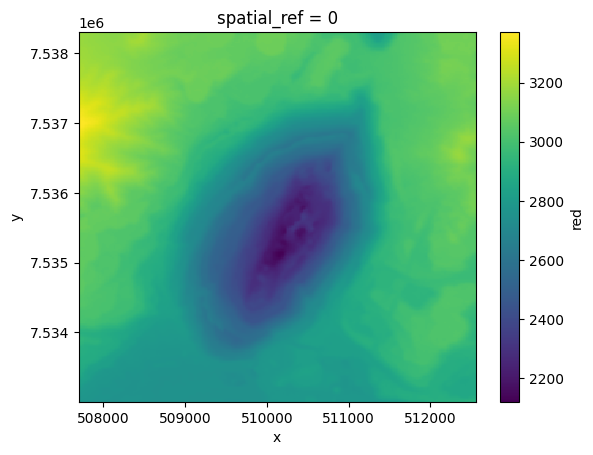

In [66]:
geotiff_ds.red.plot()

In [67]:
# Extract coordinates and values as NumPy arrays
x = geotiff_ds.x.values
y = geotiff_ds.y.values
z = geotiff_ds.red.values

In [68]:
print(z)

[[3181 3180 3179 ... 3090 3085 3085]
 [3179 3179 3178 ... 3095 3089 3088]
 [3179 3178 3177 ... 3100 3097 3092]
 ...
 [2777 2776 2775 ... 2894 2896 2895]
 [2775 2775 2774 ... 2908 2909 2908]
 [2773 2773 2772 ... 2915 2916 2916]]


In [69]:
# Create a meshgrid from the x and y coordinates
import numpy as np
X, Y = np.meshgrid(x, y)

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

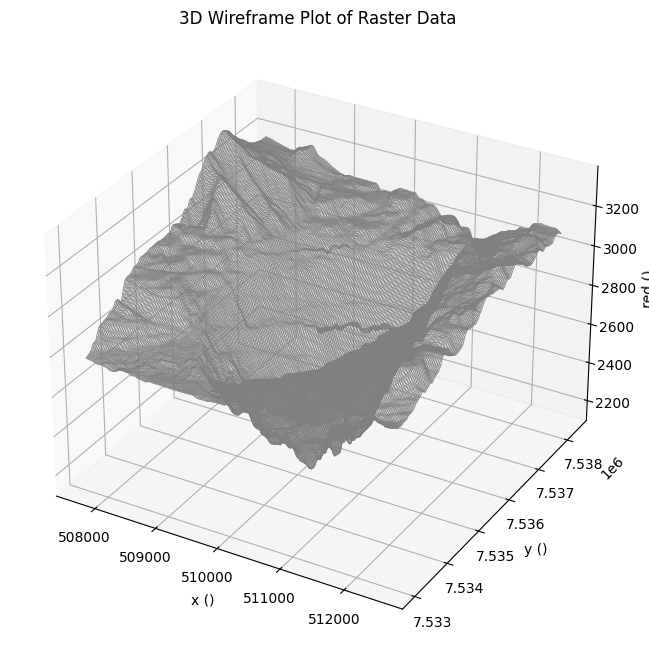

In [71]:
# 3. Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Generate the wireframe plot
# The stride arguments control the density of the wireframe lines
ax.plot_wireframe(X, Y, z, rstride=1, cstride=1, color='gray', linewidth=0.5)

# Add labels and title
ax.set_xlabel(f'{geotiff_ds.x.name} ({geotiff_ds.x.attrs.get("units", "")})')
ax.set_ylabel(f'{geotiff_ds.y.name} ({geotiff_ds.y.attrs.get("units", "")})')
ax.set_zlabel(f'{geotiff_ds.red.name} ({geotiff_ds.attrs.get("units", "")})')
ax.set_title("3D Wireframe Plot of Raster Data")

# Display the plot
plt.show()

In [72]:
from geotiff_to_stl import geotiff_to_stl

In [73]:
geotiff_to_stl(
        input_file=geotiff,
        output_file="terrain.stl",
        z_scale=100.0,          # vertical exaggeration
        base_height=1.0,      # unit base height
        simplify=False          # Resample to max 500x500
    )

Reading GeoTIFF: V2_2_-68.90_-22.28.tif
Original size: (274, 251)
Data type: int16
CRS: EPSG:32719
Bounds: BoundingBox(left=507698.51313143835, bottom=7533004.975725339, right=512553.2629046103, top=7538304.583047447)
Elevation range: 2120.00 to 3371.00
Creating 3D mesh...
Total vertices: 137548
Total faces: 275092
Saving STL to: terrain.stl
Conversion complete!
Model dimensions: 251 x 274 x 100.0
